In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

/home/codespace/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# scaling the features
X_scaled = scale(x)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

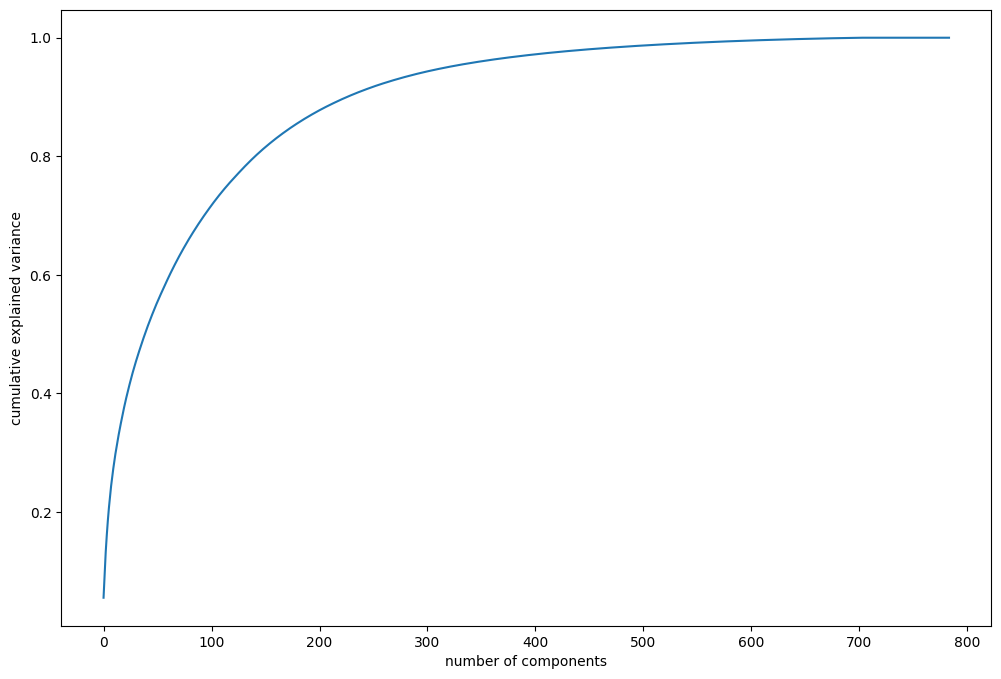

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = IncrementalPCA(n_components=400)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test) 

In [ ]:
X_train.shape

(49000, 400)

In [ ]:
# model
model = SVC(C=10, gamma = 0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9735714285714285 



In [16]:
def report(model):
    print(model.get_params())
    preds=model.predict(X_test)
    print(metrics.accuracy_score(y_test,preds)) 
    cm=metrics.confusion_matrix(y_test,preds)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
    display_labels = model.classes_)
    cm_display.plot()        
    plt.show()
    print(metrics.classification_report(y_test,preds))


{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.9735714285714285


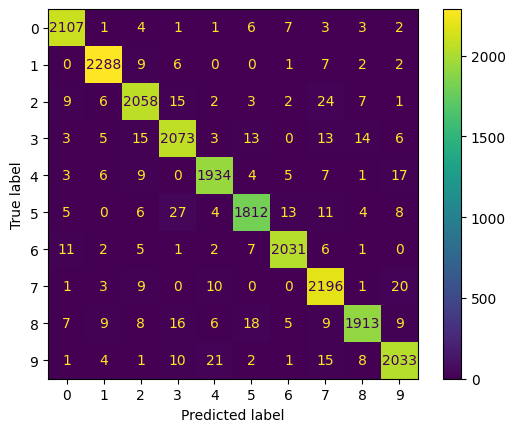

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2135
           1       0.98      0.99      0.99      2315
           2       0.97      0.97      0.97      2127
           3       0.96      0.97      0.97      2145
           4       0.98      0.97      0.97      1986
           5       0.97      0.96      0.97      1890
           6       0.98      0.98      0.98      2066
           7       0.96      0.98      0.97      2240
           8       0.98      0.96      0.97      2000
           9       0.97      0.97      0.97      2096

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [17]:
report(model)

In [20]:
from sklearn import tree

Dt = tree.DecisionTreeClassifier(random_state=0)
Dt.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
0.8151904761904762


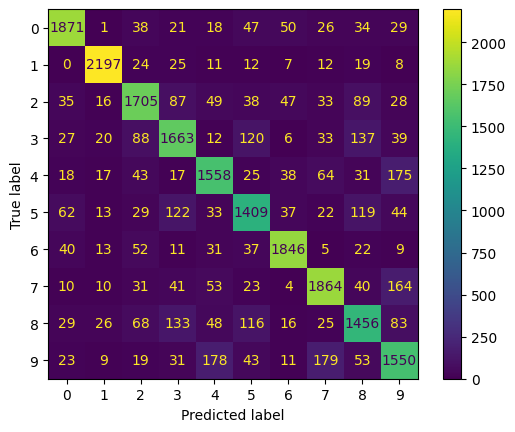

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2135
           1       0.95      0.95      0.95      2315
           2       0.81      0.80      0.81      2127
           3       0.77      0.78      0.77      2145
           4       0.78      0.78      0.78      1986
           5       0.75      0.75      0.75      1890
           6       0.90      0.89      0.89      2066
           7       0.82      0.83      0.83      2240
           8       0.73      0.73      0.73      2000
           9       0.73      0.74      0.73      2096

    accuracy                           0.82     21000
   macro avg       0.81      0.81      0.81     21000
weighted avg       0.82      0.82      0.82     21000



In [21]:
report(Dt)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.9468095238095238


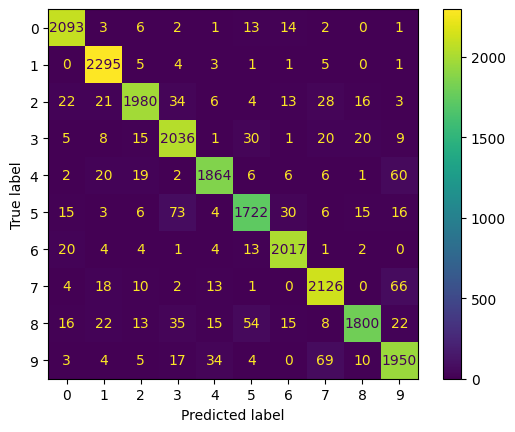

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2135
           1       0.96      0.99      0.97      2315
           2       0.96      0.93      0.95      2127
           3       0.92      0.95      0.94      2145
           4       0.96      0.94      0.95      1986
           5       0.93      0.91      0.92      1890
           6       0.96      0.98      0.97      2066
           7       0.94      0.95      0.94      2240
           8       0.97      0.90      0.93      2000
           9       0.92      0.93      0.92      2096

    accuracy                           0.95     21000
   macro avg       0.95      0.95      0.95     21000
weighted avg       0.95      0.95      0.95     21000



In [19]:
report(knn)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.9236190476190477


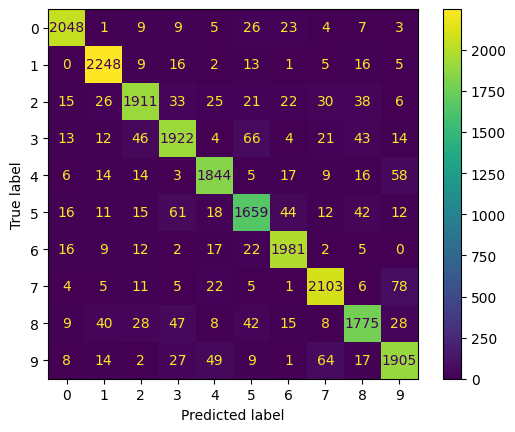

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2135
           1       0.94      0.97      0.96      2315
           2       0.93      0.90      0.91      2127
           3       0.90      0.90      0.90      2145
           4       0.92      0.93      0.93      1986
           5       0.89      0.88      0.88      1890
           6       0.94      0.96      0.95      2066
           7       0.93      0.94      0.94      2240
           8       0.90      0.89      0.90      2000
           9       0.90      0.91      0.91      2096

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty = "l2", multi_class="multinomial",
max_iter = 100 )
           
LR.fit(X_train, y_train)
report(LR)